<a href="https://colab.research.google.com/github/Travistyse/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(93756012)

In [88]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png?w=575'
example = Image(url = url, width = 400)
display(example)

In [0]:
online_weekly = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv')
cable_weekly = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv')

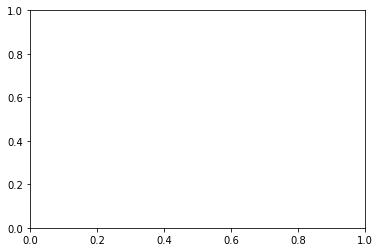

In [90]:
# Separate Figure and Axes offers more control
fig, ax = plt.subplots()

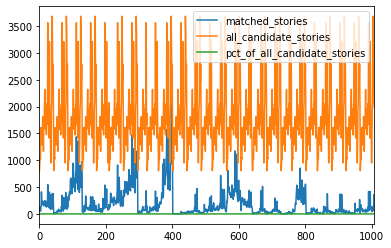

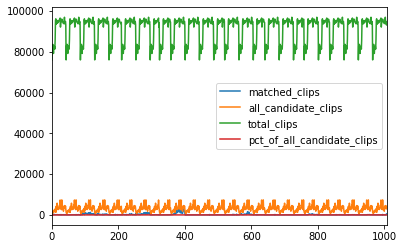

In [91]:
online_weekly.plot.line()
cable_weekly.plot.line()
fig.show()

In [92]:
# Kind of looks like my data needs some work
online_weekly.head() # Date is useable - some perf cost but nbd, really.

,date,name,matched_stories,all_candidate_stories,pct_of_all_candidate_stories,query
0,2018-12-30,Amy Klobuchar,45.0,806,0.055831,"(""Amy Klobuchar"")"
1,2019-01-06,Amy Klobuchar,55.0,915,0.060109,"(""Amy Klobuchar"")"
2,2019-01-13,Amy Klobuchar,128.0,1052,0.121673,"(""Amy Klobuchar"")"
3,2019-01-20,Amy Klobuchar,55.0,1024,0.053711,"(""Amy Klobuchar"")"
4,2019-01-27,Amy Klobuchar,74.0,1605,0.046106,"(""Amy Klobuchar"")"


In [93]:
cable_weekly.head()
# Yeah, same thing.
# So realistically I just need to actually tell matplotlib what to plot

,date,name,matched_clips,all_candidate_clips,total_clips,pct_of_all_candidate_clips,query
0,2018-12-30,Amy Klobuchar,12,1279,76029,0.009382,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
1,2019-01-06,Amy Klobuchar,7,1031,82964,0.006790,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
2,2019-01-13,Amy Klobuchar,45,615,82521,0.073171,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
3,2019-01-20,Amy Klobuchar,10,991,83649,0.010091,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
4,2019-01-27,Amy Klobuchar,16,1914,80994,0.008359,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."


The diff between red and blue lines is simply my two data sets. Online and Cable.

I want the Date (Month, Year) to be my X axis - year doesn't matter because it's all 2019 - I just need to not plot for anything earlier for Mid-April (Graph obviously doesn't start at May despite that being the first named X axis)

I want the Y axis to be the DIFFERENCE in counts between Biden and the next most mentioned candidate ( a metric decided by the media so tbh a metric I don't much value but w/e c; )

In [0]:
# Let's see if I need to "reset" the fig
fig.show()

In [95]:
# Excellent, that's exactly how I expected it to work! (:
'''
online_weekly.plot.line()
cable_weekly.plot.line()
fig.show()
'''
# I'm going to have to figure out WHO is the next most mentioned candidate
# At, mind you, this isn't *in total* it's explicitely stated that it's
# Per week - meaning this needs to be calculated on the fly
# Or a new data set needs to be made entirely
# Now, while - based on the Github - it appears these were the datasets
# Used - my initial instinct is to make new data sets entirely
# And because that's the most useful way for me to map this out it's what 
# I'm going to do

# So my expectation is to have a data set with the following columns:
# cable_biden_mentions, cable_runnerup_mentions, cable_runnerup_name, cable_date
# Then the exact same thing for online - the runner up name isn't necessary
# But I really do want to know just for the sake of knowing
# Buuuut outside of this context I probably wouldn't - I can always get that
# Data later on if necessary
# I also need to start remembering this is a notebook and I can write text


'\nonline_weekly.plot.line()\ncable_weekly.plot.line()\nfig.show()\n'

In [98]:
#BAKA
# Okay. So looks like I'm going in blind! It's cool. Not like I wanted to know
# anyway >->
online_weekly['date']

0       2018-12-30
1       2019-01-06
2       2019-01-13
3       2019-01-20
4       2019-01-27
           ...    
1003    2019-09-22
1004    2019-09-29
1005    2019-10-06
1006    2019-10-13
1007    2019-10-20
Name: date, Length: 1008, dtype: object

In [99]:
cable_weekly['date']

0       2018-12-30
1       2019-01-06
2       2019-01-13
3       2019-01-20
4       2019-01-27
           ...    
1003    2019-09-22
1004    2019-09-29
1005    2019-10-06
1006    2019-10-13
1007    2019-10-20
Name: date, Length: 1008, dtype: object

In [100]:
# Awesome, same size! :)
'''
date	name	matched_clips	all_candidate_clips
total_clips	pct_of_all_candidate_clips
You'd think I'd want pct but realistically I have to graph the total
So I need: date, name, matched_clips, all candidate clips
By this point in time I'm actually realizing this is dumb
There's no need to merge the data sets unless I'm removing data
And realistically I'll need to sort the data first by date
Oof.. time to hit up Google
1. Sort data by date
2. For each date, find the top candidate whose name isn't Biden
3. Store that candidate's row and Biden's row / discard all others
It's pretty clear to me atm that I'm going to have to restructure my data
As in, each date is the index, then candidates are listed out widely
Not even going to continue - *just* did a brief google, found nothing useful
Am now just going to do the obvious.
'''

'''
# cable_biden_mentions, cable_runnerup_mentions,
# cable_runnerup_name, cable_date
merged = (
    cable_weekly[['date', 'product_name']]
    .merge(online_weekly[['date', 'product_id']])
)
merged.head()
'''
wide = cable_weekly.pivot_table(index='date', columns='name',
                                values=['matched_clips','all_candidate_clips'])
wide

all_candidate_clips              ... matched_clips              
name             Amy Klobuchar Andrew Yang  ...    Tom Steyer Tulsi Gabbard
date                                        ...                            
2018-12-30              1279.0      1279.0  ...          12.0           0.0
2019-01-06              1031.0      1031.0  ...          11.0          16.0
2019-01-13               615.0       615.0  ...           2.0          28.0
2019-01-20               991.0       991.0  ...           0.0          22.0
2019-01-27              1914.0      1914.0  ...           7.0          15.0
2019-02-03              1454.0      1454.0  ...           5.0          34.0
2019-02-10              1917.0      1917.0  ...           4.0           7.0
2019-02-17              2422.0      2422.0  ...           7.0          10.0
2019-02-24              1545.0      1545.0  ...          16.0          11.0
2019-03-03              1587.0      1587.0  ...          20.0          21.0
2019-03-10              2431.0      2431.0  ...          13.0          26.0
2019-03-17              3174.0      3174.0  ...           2.0          11.0
2019-03-24              1248.0      1248.0  ...           5.0           4.0
2019-03-31              4205.0      4205.0  ...           0.0           1.0
2019-04-07              2345.0      2345.0  ...          16.0          11.0
2019-04-14              2639.0      2639.0  ...          41.0           5.0
2019-04-21              5749.0      5749.0  ...          33.0          23.0
2019-04-28              3956.0      3956.0  ...          14.0           7.0
2019-05-05              2748.0      2748.0  ...           1.0           5.0
2019-05-12              3694.0      3694.0  ...           6.0          12.0
2019-05-19              2650.0      2650.0  ...           6.0          11.0
2019-05-26              3059.0      3059.0  ...          18.0           7.0
2019-06-02              3103.0      3103.0  ...           4.0           1.0
2019-06-09              4780.0      4780.0  ...           6.0           9.0
2019-06-16              4485.0      4485.0  ...           7.0          14.0
2019-06-23              7316.0      7316.0  ...           0.0         110.0
2019-06-30              4384.0      4384.0  ...           4.0          13.0
2019-07-07              3052.0      3052.0  ...         128.0           2.0
2019-07-14              3029.0      3029.0  ...         113.0          36.0
2019-07-21              2574.0      2574.0  ...          95.0          20.0
2019-07-28              7361.0      7361.0  ...          73.0         236.0
2019-08-04              3028.0      3028.0  ...         103.0          28.0
2019-08-11              3288.0      3288.0  ...         141.0          13.0
2019-08-18              3488.0      3488.0  ...         155.0          24.0
2019-08-25              3171.0      3171.0  ...         166.0          70.0
2019-09-01              1829.0      1829.0  ...          25.0           6.0
2019-09-08              4164.0      4164.0  ...          29.0          16.0
2019-09-15              4248.0      4248.0  ...          13.0          22.0
2019-09-22              4582.0      4582.0  ...          18.0          36.0
2019-09-29              3986.0      3986.0  ...          20.0          10.0
2019-10-06              3030.0      3030.0  ...          42.0           9.0
2019-10-13              4393.0      4393.0  ...         107.0         335.0
2019-10-20              3100.0      3100.0  ...          56.0         476.0

[43 rows x 50 columns]

In [101]:
# Okay, let's try this again because that's obviously borked
wide2 = cable_weekly.pivot_table(index='date', columns='name',
                                values='matched_clips')
wide2

name,Amy Klobuchar,Andrew Yang,Bernie Sanders,Beto O'Rourke,Bill de Blasio,Cory Booker,Elizabeth Warren,Eric Swalwell,Jay Inslee,Joe Biden,Joe Sestak,John Delaney,John Hickenlooper,Julian Castro,Kamala Harris,Kirsten Gillibrand,Marianne Williamson,Michael Bennet,Mike Gravel,Pete Buttigieg,Seth Moulton,Steve Bullock,Tim Ryan,Tom Steyer,Tulsi Gabbard
date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-30,12.0,0.0,246.0,101.0,2.0,39.0,721.0,31.0,4.0,177.0,0.0,5.0,1.0,5.0,74.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,12.0,0.0
2019-01-06,7.0,0.0,134.0,127.0,23.0,15.0,424.0,22.0,7.0,183.0,0.0,2.0,1.0,68.0,99.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0
2019-01-13,45.0,0.0,70.0,78.0,25.0,31.0,105.0,19.0,0.0,104.0,0.0,5.0,0.0,48.0,64.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,28.0
2019-01-20,10.0,1.0,147.0,27.0,3.0,59.0,158.0,31.0,7.0,155.0,0.0,2.0,3.0,8.0,366.0,93.0,0.0,18.0,0.0,23.0,0.0,0.0,1.0,0.0,22.0
2019-01-27,16.0,3.0,146.0,28.0,3.0,378.0,354.0,27.0,2.0,185.0,0.0,3.0,3.0,55.0,905.0,43.0,0.0,3.0,0.0,3.0,0.0,5.0,2.0,7.0,15.0
2019-02-03,64.0,0.0,162.0,82.0,3.0,246.0,564.0,28.0,6.0,156.0,0.0,1.0,2.0,26.0,238.0,62.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,5.0,34.0
2019-02-10,384.0,3.0,101.0,418.0,29.0,211.0,455.0,14.0,1.0,171.0,0.0,8.0,0.0,15.0,272.0,48.0,0.0,6.0,0.0,6.0,1.0,0.0,18.0,4.0,7.0
2019-02-17,231.0,6.0,1039.0,102.0,16.0,195.0,309.0,19.0,2.0,317.0,0.0,6.0,3.0,20.0,513.0,47.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,7.0,10.0
2019-02-24,52.0,3.0,664.0,78.0,9.0,67.0,177.0,29.0,69.0,283.0,0.0,3.0,4.0,13.0,232.0,23.0,1.0,2.0,0.0,2.0,2.0,0.0,3.0,16.0,11.0


In [104]:
wide2.head()

name,Amy Klobuchar,Andrew Yang,Bernie Sanders,Beto O'Rourke,Bill de Blasio,Cory Booker,Elizabeth Warren,Eric Swalwell,Jay Inslee,Joe Biden,Joe Sestak,John Delaney,John Hickenlooper,Julian Castro,Kamala Harris,Kirsten Gillibrand,Marianne Williamson,Michael Bennet,Mike Gravel,Pete Buttigieg,Seth Moulton,Steve Bullock,Tim Ryan,Tom Steyer,Tulsi Gabbard
date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-30,12.0,0.0,246.0,101.0,2.0,39.0,721.0,31.0,4.0,177.0,0.0,5.0,1.0,5.0,74.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,12.0,0.0
2019-01-06,7.0,0.0,134.0,127.0,23.0,15.0,424.0,22.0,7.0,183.0,0.0,2.0,1.0,68.0,99.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0
2019-01-13,45.0,0.0,70.0,78.0,25.0,31.0,105.0,19.0,0.0,104.0,0.0,5.0,0.0,48.0,64.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,28.0
2019-01-20,10.0,1.0,147.0,27.0,3.0,59.0,158.0,31.0,7.0,155.0,0.0,2.0,3.0,8.0,366.0,93.0,0.0,18.0,0.0,23.0,0.0,0.0,1.0,0.0,22.0
2019-01-27,16.0,3.0,146.0,28.0,3.0,378.0,354.0,27.0,2.0,185.0,0.0,3.0,3.0,55.0,905.0,43.0,0.0,3.0,0.0,3.0,0.0,5.0,2.0,7.0,15.0


In [105]:
wide2.iloc[3] #OH HO HO HO :D YESSS! 

name
Amy Klobuchar           10.0
Andrew Yang              1.0
Bernie Sanders         147.0
Beto O'Rourke           27.0
Bill de Blasio           3.0
Cory Booker             59.0
Elizabeth Warren       158.0
Eric Swalwell           31.0
Jay Inslee               7.0
Joe Biden              155.0
Joe Sestak               0.0
John Delaney             2.0
John Hickenlooper        3.0
Julian Castro            8.0
Kamala Harris          366.0
Kirsten Gillibrand      93.0
Marianne Williamson      0.0
Michael Bennet          18.0
Mike Gravel              0.0
Pete Buttigieg          23.0
Seth Moulton             0.0
Steve Bullock            0.0
Tim Ryan                 1.0
Tom Steyer               0.0
Tulsi Gabbard           22.0
Name: 2019-01-20, dtype: float64

In [106]:
wide2.iloc[3][0]

10.0

In [107]:
len(wide2.iloc[3]) #25 entries - meaning last index is 24 (9 is Biden)

25

In [108]:
cable_weekly['name'].unique()

array(['Amy Klobuchar', 'Andrew Yang', 'Bernie Sanders', "Beto O'Rourke",
       'Bill de Blasio', 'Cory Booker', 'Elizabeth Warren',
       'Eric Swalwell', 'Jay Inslee', 'Joe Biden', 'Joe Sestak',
       'John Delaney', 'John Hickenlooper', 'Julian Castro',
       'Kamala Harris', 'Kirsten Gillibrand', 'Marianne Williamson',
       'Michael Bennet', 'Mike Gravel', 'Pete Buttigieg', 'Seth Moulton',
       'Steve Bullock', 'Tim Ryan', 'Tom Steyer', 'Tulsi Gabbard'],
      dtype=object)

In [0]:
# Let's store that in a list so that I can reference it by index
names = cable_weekly['name'].unique()

In [110]:
names.dtype

dtype('O')

In [111]:
print(names[2])
#names[2].dtype # It's a string. :D Thanks error message!

Bernie Sanders


In [112]:
len(wide2)

43

In [0]:
# Starting to lose focus on the goal here
# I've dug a hole and now I'm like "Wait..." xD
# Let's see about making a list with this data (:
# Because ultimately all I need for matplotlib is an x,y which is
# Date, Mentions > nearest candidate
#i = -1
#for name in 

# Actually, it looks like I need this in an alt format? Let's check
# Because otherwise I'll need to loop in a different way. Nbd but..
# Actually, nvm. I'd still be doing the same thing, just differently
# Like, rn I'm sorting by date and each column is a name
# I'll I'd be doing is changing that to sorting by person
# And each column being a year. And I don't think that helps me.
# And, yeah, sure, I can use .melt and other stuff to more or less
# Append entire columns onto one another but realistically
# This is the most readable my data can be
#wide2.iloc[3]
# 24 max index (25 total) and 9th index is Biden
# cable_weekly['date'] gives me the dates in order

# Anything you want to survive the scope of a loop has to be
# Initialized outside of the loop to begin with
ru = []
ru_m = []
biden = []
#print('Okay so ', (len(wide2) - 1))
for entry in range( len(wide2) ): # All entries
  runner_up_index = -1
  runner_up_mentions = -1

  for cand_name_index in range(len(wide2.iloc[entry])): # Mentions per candidate
    #print('mention: ', cand_name_index)
    if cand_name_index == 9: # If candidate is Biden
      biden.append(wide2.iloc[entry, cand_name_index]) # Add it to the Biden list
      continue # Thank you, nEXt! (Skip and keep looping)
    else:
      num_mentions = wide2.iloc[entry, cand_name_index] # Store mentions in local var
      if num_mentions > runner_up_mentions: # If this is most mentions thus far
        runner_up_mentions = num_mentions # New high score!
        runner_up_index = cand_name_index # New high score name! (:
      
  # End of the candidate loop, time to check my counters
  #print('entry', entry)
  ru.append(names[runner_up_index])
  ru_m.append(runner_up_mentions)


Gotta repeat this for Online - should've made better variable name choices but actually forgot about this!

In [131]:
wide_o = online_weekly.pivot_table(index='date', columns='name',
                                values='matched_stories')
wide_o

name,Amy Klobuchar,Andrew Yang,Bernie Sanders,Beto O'Rourke,Bill de Blasio,Cory Booker,Elizabeth Warren,Eric Swalwell,Jay Inslee,Joe Biden,Joe Sestak,John Delaney,John Hickenlooper,Julian Castro,Kamala Harris,Kirsten Gillibrand,Marianne Williamson,Michael Bennet,Mike Gravel,Pete Buttigieg,Seth Moulton,Steve Bullock,Tim Ryan,Tom Steyer,Tulsi Gabbard
date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-30,45.0,2.0,277.0,43.0,46.0,96.0,443.0,27.0,24.0,158.0,0.0,38.0,10.0,47.0,138.0,63.0,1.0,2.0,0.0,8.0,11.0,6.0,27.0,41.0,17.0
2019-01-06,55.0,6.0,329.0,61.0,80.0,132.0,321.0,12.0,37.0,162.0,0.0,51.0,10.0,118.0,236.0,68.0,1.0,7.0,0.0,3.0,3.0,10.0,10.0,65.0,91.0
2019-01-13,128.0,9.0,250.0,55.0,66.0,131.0,325.0,32.0,26.0,117.0,1.0,41.0,9.0,159.0,220.0,258.0,2.0,5.0,0.0,19.0,12.0,10.0,40.0,23.0,171.0
2019-01-20,55.0,7.0,297.0,22.0,41.0,135.0,330.0,21.0,19.0,186.0,0.0,35.0,15.0,86.0,422.0,238.0,3.0,41.0,0.0,89.0,4.0,7.0,11.0,24.0,96.0
2019-01-27,74.0,14.0,410.0,35.0,71.0,388.0,604.0,37.0,41.0,222.0,0.0,51.0,28.0,207.0,808.0,304.0,18.0,20.0,1.0,69.0,9.0,26.0,13.0,24.0,114.0
2019-02-03,143.0,11.0,412.0,64.0,59.0,367.0,586.0,56.0,33.0,196.0,0.0,18.0,30.0,82.0,454.0,301.0,7.0,16.0,0.0,53.0,6.0,12.0,13.0,17.0,72.0
2019-02-10,411.0,28.0,359.0,159.0,183.0,331.0,548.0,30.0,41.0,184.0,1.0,40.0,26.0,70.0,481.0,280.0,21.0,29.0,1.0,59.0,21.0,23.0,20.0,37.0,88.0
2019-02-17,256.0,13.0,633.0,49.0,97.0,319.0,438.0,14.0,22.0,210.0,0.0,32.0,17.0,66.0,507.0,233.0,14.0,16.0,0.0,52.0,5.0,5.0,8.0,16.0,70.0
2019-02-24,169.0,12.0,628.0,55.0,56.0,214.0,395.0,45.0,131.0,199.0,1.0,21.0,33.0,82.0,395.0,176.0,11.0,26.0,1.0,37.0,7.0,22.0,10.0,38.0,39.0


In [0]:
o_ru = []
o_ru_m = []
o_biden = []
#print('Okay so ', (len(wide_o) - 1))
for entry in range( len(wide_o) ): # All entries
  runner_up_index = -1
  runner_up_mentions = -1

  for cand_name_index in range(len(wide_o.iloc[entry])): # Mentions per candidate
    #print('mention: ', cand_name_index)
    if cand_name_index == 9: # If candidate is Biden
      o_biden.append(wide_o.iloc[entry, cand_name_index]) # Add it to the Biden list
      continue # Thank you, nEXt! (Skip and keep looping)
    else:
      num_mentions = wide_o.iloc[entry, cand_name_index] # Store mentions in local var
      if num_mentions > runner_up_mentions: # If this is most mentions thus far
        runner_up_mentions = num_mentions # New high score!
        runner_up_index = cand_name_index # New high score name! (:
      
  # End of the candidate loop, time to check my counters
  #print('entry', entry)
  o_ru.append(names[runner_up_index])
  o_ru_m.append(runner_up_mentions)


In [116]:
example

In [117]:
cable_weekly['date'][0]

'2018-12-30'

In [0]:
updated_dates = pd.to_datetime(cable_weekly['date'], infer_datetime_format=True)

In [120]:
updated_dates[2]

Timestamp('2019-01-13 00:00:00')

In [136]:
updated_dates[2].year

2019

In [146]:
updated_dates

0      2018-12-30
1      2019-01-06
2      2019-01-13
3      2019-01-20
4      2019-01-27
          ...    
1003   2019-09-22
1004   2019-09-29
1005   2019-10-06
1006   2019-10-13
1007   2019-10-20
Name: date, Length: 1008, dtype: datetime64[ns]

In [0]:
# That was WAY too high - we want unique
updated_dates = pd.to_datetime(cable_weekly['date'].unique(), infer_datetime_format=True)

In [148]:
updated_dates # The first 15 (1 based, not starting at 0) 
# Can be removed / ignored as they're definitely not the starting point

DatetimeIndex(['2018-12-30', '2019-01-06', '2019-01-13', '2019-01-20',
               '2019-01-27', '2019-02-03', '2019-02-10', '2019-02-17',
               '2019-02-24', '2019-03-03', '2019-03-10', '2019-03-17',
               '2019-03-24', '2019-03-31', '2019-04-07', '2019-04-14',
               '2019-04-21', '2019-04-28', '2019-05-05', '2019-05-12',
               '2019-05-19', '2019-05-26', '2019-06-02', '2019-06-09',
               '2019-06-16', '2019-06-23', '2019-06-30', '2019-07-07',
               '2019-07-14', '2019-07-21', '2019-07-28', '2019-08-04',
               '2019-08-11', '2019-08-18', '2019-08-25', '2019-09-01',
               '2019-09-08', '2019-09-15', '2019-09-22', '2019-09-29',
               '2019-10-06', '2019-10-13', '2019-10-20'],
              dtype='datetime64[ns]', freq=None)

In [0]:
# Finally, I'm going to actually need to calculate all of this in advance x.x
online_graph = []
cable_graph = []

for entry in range( len(o_biden) ): #Runs 43 times
  online_graph.append(o_biden[entry] / o_ru_m[entry])
  cable_graph.append(biden[entry] / ru_m[entry])


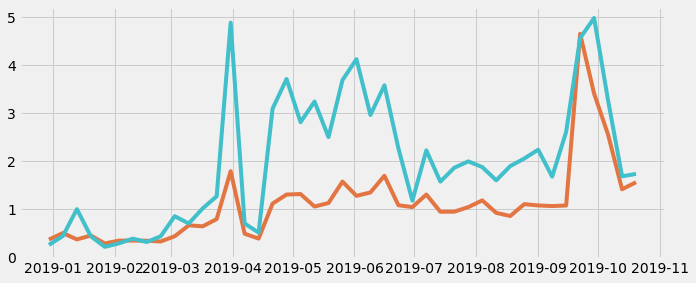

In [163]:
# ALRIGHT. I AM FINALLY READY TO GRAPH MAH DATA!
# I also have a sneaking suspicion that there's no way Lambda would be
# Asking their students to do what I just did so there's probably an easier
# Way - one which likely didn't even involve adjusting the data
# But whatever - It was great practice (:

'''
online_weekly.plot.line()
cable_weekly.plot.line()
fig.show()

o_ru = []
o_ru_m = []
o_biden = []
'''
# X axis is the date
# Blue Y axis is Biden - Runner up mentions in cable news
# Red-Orange Y Axis is the same but online articles
#fig, (c_ax, o_ax) = plt.subplots(1,1, sharey=True)
#fig.plot(ax)
#Blue: 41BFCA
#Red: E27542
#fig = plt.figure(figsize(12, 8))
plt.style.use('fivethirtyeight')
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(10.31)
ax = fig.add_subplot(1, 1, 1, aspect=24)

ax.plot(updated_dates, online_graph, color='#E27542')
ax.plot(updated_dates, cable_graph, color='#41BFCA')

#ax.set_xticks(["MAY '19", "JUNE", "JULY", "AUG.", "SEPT.", "OCT."])
#ax.set_yticks(["EVEN", 2, 3, 4, "5x"])

'''
for entry in range( len(o_biden) ): #Runs 43 times
    # Plot each line separately with its own color.
    #print("c ", biden[entry] / ru_m[entry])
    #print("c ", biden[entry])
    #print("ru ", ru_m[entry])
    #print("c / ru ", biden[entry] / ru_m[entry])
    #print(updated_dates[entry].month)
    ax.plot(updated_dates[entry].month, o_biden[entry] / o_ru_m[entry])#, color='#E27542')
    ax.plot(updated_dates[entry].month, biden[entry] / ru_m[entry])#, color='#41BFCA')
'''

fig.show()

In [161]:
example

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here